# Making a line with (x, y) steps

The purpose of this exercise is to calculate the discreet x and y steps (like we might have from a stepper motor) needed to make a line of any slope.  Note: this uses Bresenhan's Algorithm https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm

The general equation of a line through two given points is: $${\frac {y-y_{0}}{y_{1}-y_{0}}}={\frac {x-x_{0}}{x_{1}-x_{0}}}$$

Let's use the example of the two points (0,0) and (20,10)

The equation for this line is then: $$ {\frac {y-0}{10-0}}={\frac {x-0}{20-0}}$$
or $$y={\frac {x}{2}}$$

So, for every time $x$ makes a step, $y$ moves ${\frac {1}{2}}$ step.
Since there are no half steps we need to round and return the 'error' to be accumulated as we travel from $(x_{0}, y_{0})$ to $(x_{1}, y_{1})$.  Note: we also need to return the current position.

In [1]:
# First do some imports, so we can see what we're doing:
%matplotlib notebook

import matplotlib.pyplot as plt
from math import sqrt

In [2]:
def get_line(start, end):
    """Bresenham's Line Algorithm
    from: http://www.roguebasin.com/index.php?title=Bresenham%27s_Line_Algorithm
    Produces a list of tuples from start and end
 
    >>> points1 = get_line((0, 0), (3, 4))
    >>> points2 = get_line((3, 4), (0, 0))
    >>> assert(set(points1) == set(points2))
    >>> print points1
    [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4)]
    >>> print points2
    [(3, 4), (2, 3), (1, 2), (1, 1), (0, 0)]
    """
    # Setup initial conditions
    x1, y1 = start
    x2, y2 = end
    dx = x2 - x1
    dy = y2 - y1
 
    # Determine how steep the line is
    is_steep = abs(dy) > abs(dx)
 
    # Rotate line
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
 
    # Swap start and end points if necessary and store swap state
    swapped = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        swapped = True
 
    # Recalculate differentials
    dx = x2 - x1
    dy = y2 - y1
 
    # Calculate error
    error = int(dx / 2.0)
    ystep = 1 if y1 < y2 else -1
 
    # Iterate over bounding box generating points between start and end
    y = y1
    points = []
    for x in range(x1, x2 + 1):
        coord = (y, x) if is_steep else (x, y)
        points.append(coord)
        error -= abs(dy)
        if error < 0:
            y += ystep
            error += dx
 
    # Reverse the list if the coordinates were swapped
    if swapped:
        points.reverse()
    return points

<IPython.core.display.Javascript object>


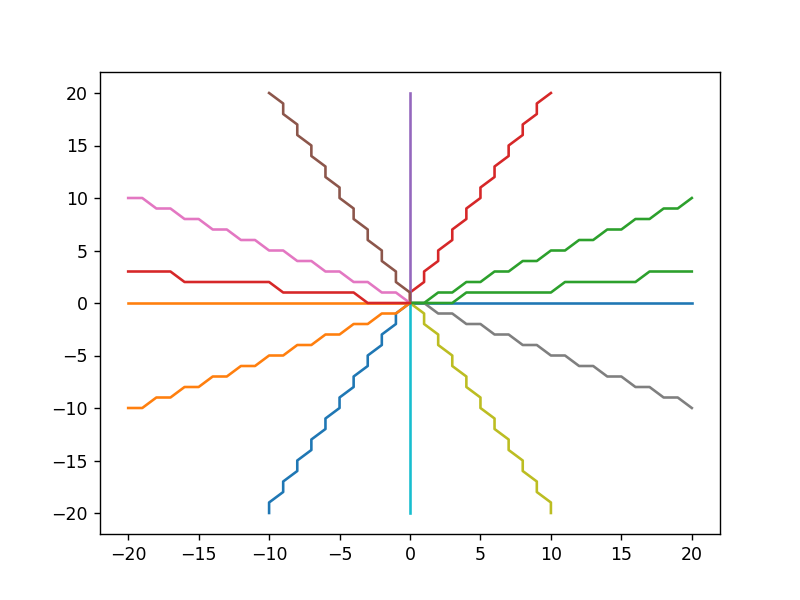

In [3]:
points = [(20,0), (-20, 0), (20, 10), (10, 20), (0, 20), 
          (-10, 20), (-20, 10), (20, -10), (10, -20), 
          (0, -20), (-10, -20), (-20, -10),
          (20, 3), (-20, 3)]

for point in points:
    line = get_line((0,0), point)
    x, y = zip(*line)
    plt.plot(x, y)

## Converting x, y coordinates to cable lengths

``` 
           d
m1 o______________o m2
    \          __/
     \      __/
    a \  __/ b
       \/
       *
      (x,y)
    ```

Given the coordinates $(x,y)$, we need to calculate the lengths of the two cables which hold the pen, $a$ and $b$.

$a$ is the hypotenuse of a triangle with sides $x$ and $y$, so the length of a is: $$a = {\sqrt {x^2 + y^2}}$$
If the distance between the motors is $d$, then the length of $b$ is given by: $$b = {\sqrt {(d-x)^2 + y^2}}$$

So, if we're looking to draw a line between the "points" $(10, 10)$ and $(25, 50)$, let's first get our cable length targets.  Here's a function to do that:

In [4]:
def cable_steps(x, y, d=500, steps_per_inch=25):
    a = int((sqrt(x**2 + y**2))*steps_per_inch)
    b = int((sqrt((d-x)**2 + y**2))*steps_per_inch)
    return a, b

In [ ]:
# Get cable lengths (measured in steps) for our two points (measured in inches):
x0, y0 = (1, 1)
x1, y1 = (2, 3)

a0, b0 = cable_steps(x0, y0)
a1, b1 = cable_steps(x1, y1)

**This** is where we call our function to get our line movement:

In [ ]:
path = get_line((a0, b0), (a1, b1))

In [ ]:
path[:20]  # show the first 20 locations in path